In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('../data/telecom_data.xlsx')

In [39]:
data.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,13114483499779198976,2019-04-12 21:37:31,439.0,2019-04-25 08:08:09,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,13114483501243799552,2019-04-13 08:41:59,612.0,2019-04-25 08:16:21,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9164567010589190,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,13042425910865399808,2019-04-14 02:11:59,592.0,2019-04-25 02:26:52,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,13114483506432499712,2019-04-14 12:48:32,121.0,2019-04-25 10:22:26,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,13042425914669299712,2019-04-15 00:32:15,0.0,2019-04-25 00:40:17,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [3]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


# Top 10 handsets used by the customers

In [3]:
# Start by identifying the top 10 handsets used by the customers.
df_handsets = pd.DataFrame()
df_handsets['customers'] = data['MSISDN/Number']
df_handsets['handsets'] = data['Handset Type']
df_handsets = df_handsets.groupby('handsets').count()
df_handsets = df_handsets.sort_values('customers', ascending = False)
df_handsets.head(11)


,customers
handsets,
Huawei B528S-23A,19727
Apple iPhone 6S (A1688),9413
Apple iPhone 6 (A1586),9012
undefined,8931
Apple iPhone 7 (A1778),6304
Apple iPhone Se (A1723),5176
Apple iPhone 8 (A1905),4985
Apple iPhone Xr (A2105),4562
Samsung Galaxy S8 (Sm-G950F),4480


# Top 3 handset manufacturers

In [4]:
df_manufacturers = pd.DataFrame()
df_manufacturers['customers'] = data['MSISDN/Number']
df_manufacturers['manufacturers'] = data['Handset Manufacturer']
df_manufacturers = df_manufacturers.groupby('manufacturers').count()
df_manufacturers = df_manufacturers.sort_values('customers', ascending = False)
df_manufacturers = df_manufacturers.head(3)
df_manufacturers

,customers
manufacturers,
Apple,59464
Samsung,40579
Huawei,34366


# Top 5 handsets per top 3 handset manufacturer

In [5]:
df_handset_manufacturer = pd.DataFrame()
df_handset_manufacturer['customers'] = data['MSISDN/Number']
df_handset_manufacturer['manufacturers'] = data['Handset Manufacturer']
df_handset_manufacturer['handset'] = data['Handset Type']
df_handset_manufacturer = df_handset_manufacturer[df_handset_manufacturer['manufacturers'].isin(list(df_manufacturers.index))]

df_handset_manufacturer = df_handset_manufacturer.groupby(['manufacturers','handset']).count().reset_index()
#pd.set_option('display.max_rows', 500)
#df_handset_manufacturer
df_top5_handsets = pd.DataFrame()
for manufacturer in list(df_manufacturers.index):
    df = df_handset_manufacturer[df_handset_manufacturer['manufacturers'] == manufacturer]
    df = df.sort_values('customers', ascending = False)
    df_top5_handsets = pd.concat([df_top5_handsets, df.head(5)], axis=0)
df_top5_handsets

,manufacturers,handset,customers
35,Apple,Apple iPhone 6S (A1688),9413
31,Apple,Apple iPhone 6 (A1586),9012
41,Apple,Apple iPhone 7 (A1778),6304
55,Apple,Apple iPhone Se (A1723),5176
48,Apple,Apple iPhone 8 (A1905),4985
359,Samsung,Samsung Galaxy S8 (Sm-G950F),4480
242,Samsung,Samsung Galaxy A5 Sm-A520F,3708
292,Samsung,Samsung Galaxy J5 (Sm-J530),3682
284,Samsung,Samsung Galaxy J3 (Sm-J330),3464
357,Samsung,Samsung Galaxy S7 (Sm-G930X),3176


# Task 1.1 
Aggregate per user the following information in the column :
   - number of xDR sessions
   - Session duration
   - the total download (DL) and upload (UL) data
   - the total data volume (in Bytes) during this session for each application

In [6]:

'''
Aggregate per user the following information in the column
○ number of xDR sessions
○ Session duration
○ the total download (DL) and upload (UL) data
○ the total data volume (in Bytes) during this session for each application

'''
df_customers = pd.DataFrame()
df_customers['msisdn_number'] = data['MSISDN/Number']
df_customers['xdr_session'] = data['Bearer Id']
#df_customers['session_start'] = data['Start']
#df_customers['session_end'] = data['End']
df_customers['session_duration_ms'] = data['Dur. (ms)']
df_customers['total_dl'] = data['Total DL (Bytes)']
df_customers['total_ul'] = data['Total UL (Bytes)']
df_customers['social_media'] = data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)']
df_customers['google'] = data['Google DL (Bytes)'] + data['Google UL (Bytes)']
df_customers['email'] = data['Email DL (Bytes)'] + data['Email UL (Bytes)']
df_customers['youtube'] = data['Youtube DL (Bytes)'] + data['Youtube UL (Bytes)']
df_customers['netflix'] = data['Netflix DL (Bytes)'] + data['Netflix UL (Bytes)']
df_customers['gaming'] = data['Gaming DL (Bytes)'] + data['Gaming UL (Bytes)']
df_customers['other'] = data['Other DL (Bytes)'] + data['Other UL (Bytes)']

df_customers2 = df_customers.groupby('msisdn_number').aggregate({
    'xdr_session': 'count',
    'session_duration_ms': 'sum',
    'total_dl': 'sum',
    'total_ul': 'sum',
    'social_media': 'sum',
    'google': 'sum',
    'email': 'sum',
    'youtube': 'sum',
    'netflix': 'sum',
    'gaming': 'sum',
    'other': 'sum',})
df_customers2.sort_values('xdr_session', ascending = False).reset_index()



,msisdn_number,xdr_session,session_duration_ms,total_dl,total_ul,social_media,google,email,youtube,netflix,gaming,other
0,3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09
1,3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09
2,3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09
3,3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09
4,3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.366068e+10,1,86400.0,3.602294e+08,17655907.0,1078581.0,6177095.0,2329491.0,15747875.0,13796465.0,3.331056e+08,8.260895e+08
106852,3.366068e+10,1,13150.0,2.323253e+08,30223370.0,2494472.0,7176757.0,3978724.0,22312575.0,22243664.0,1.975721e+08,2.629445e+08
106853,3.366067e+10,1,102488.0,6.872748e+08,43357554.0,2496026.0,10836038.0,1453945.0,17872557.0,10267932.0,6.711733e+08,6.825180e+08
106854,3.366067e+10,1,22737.0,7.294155e+08,29475128.0,2405132.0,11084149.0,2410554.0,22007192.0,18669117.0,7.009041e+08,7.910590e+08


In [23]:
#find and replace outliers with NaN
for column in list(df_customers.columns[2:]):
    z_score = np.abs(stats.zscore(df_customers[column]))
    df_customers['z_score'] = z_score
    df_customers.loc[df_customers['z_score'] > 3, column] = np.NaN
    
#replace missing values with the column mean
for column in list(df_customers.columns[2:]):
    df_customers[column].fillna(df_customers[column].mean(), inplace=True)

df_customers

,msisdn_number,xdr_session,session_duration_ms,total_dl,total_ul,social_media,google,email,youtube,netflix,gaming,other,z_score
0,3.366496e+10,13114483460844900352,1.823652e+06,3.088796e+08,3.674974e+07,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08,1.022770e+00
1,3.368185e+10,13114483482878900224,1.365104e+06,6.533850e+08,5.380039e+07,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08,4.628409e-01
2,3.376063e+10,13114483484080500736,1.361762e+06,2.798073e+08,2.788364e+07,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08,5.942843e-02
3,3.375034e+10,13114483485442799616,1.321509e+06,8.460285e+08,4.332422e+07,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08,1.366694e+00
4,3.369980e+10,13114483499480700928,1.089009e+06,5.691386e+08,3.854281e+07,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08,5.559913e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,7277825670196679680,8.123000e+04,5.741753e+08,5.762885e+07,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07,1.696132e+00
149997,3.366345e+10,7349883264234609664,9.797000e+04,6.666488e+08,3.913508e+07,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08,1.172672e+00
149998,3.362189e+10,13114483573367300096,9.824900e+04,5.927864e+08,3.491222e+07,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08,1.220673e+00
149999,3.361962e+10,13114483573367300096,9.791000e+04,3.718959e+08,2.962610e+07,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08,1.589835e+00


In [7]:
analysis_df = pd.DataFrame()
analysis_df['msisdn_number'] = data['MSISDN/Number']
analysis_df['dur'] = data['Dur. (ms)']
analysis_df['Total_DL'] = data['Total DL (Bytes)']
analysis_df['Total_UL'] = data['Total UL (Bytes)']
analysis_df['social_media'] = df_customers['social_media']
analysis_df['google'] = df_customers['google']
analysis_df['email'] = df_customers['email']
analysis_df['youtube'] = df_customers['youtube']
analysis_df['netflix'] = df_customers['netflix']
analysis_df['gaming'] = df_customers['gaming']
analysis_df['other'] = df_customers['other']


analysis_df.describe()

,msisdn_number,dur,Total_DL,Total_UL,social_media,google,email,youtube,netflix,gaming,other
count,1.489350e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,4.188282e+10,1.046086e+05,4.546434e+08,4.112121e+07,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08
std,2.447443e+12,8.103762e+04,2.441429e+08,1.127639e+07,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08
min,3.360100e+10,7.142000e+03,7.114041e+06,2.866892e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05
25%,3.365130e+10,5.744050e+04,2.431068e+08,3.322201e+07,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08
50%,3.366371e+10,8.639900e+04,4.558411e+08,4.114331e+07,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08
75%,3.368349e+10,1.324302e+05,6.657055e+08,4.903424e+07,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08
max,8.823971e+14,1.859336e+06,9.029696e+08,7.833131e+07,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08


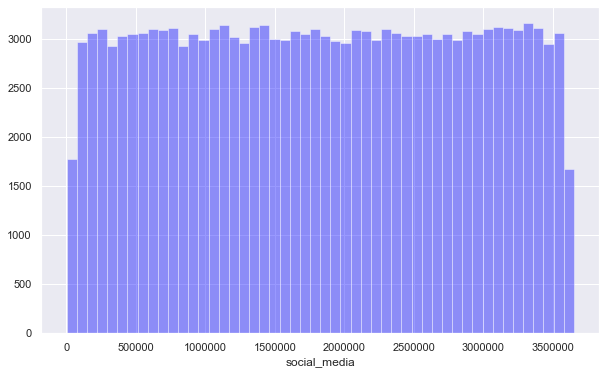

In [8]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.set(style = 'darkgrid')
sns.distplot(analysis_df['social_media'], color = 'blue', kde = False)

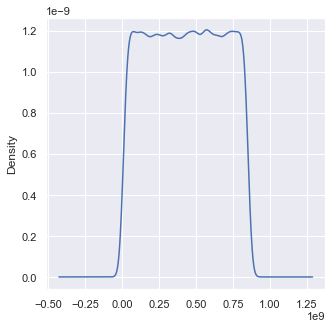

In [9]:
plt.figure(figsize=(5,5))
analysis_df['gaming'].plot(kind = 'density')

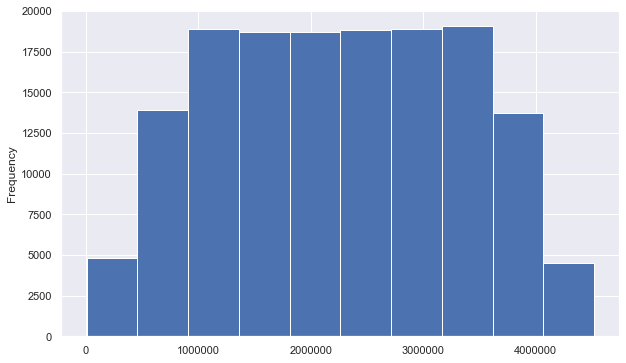

In [10]:
analysis_df['email'].plot.hist()

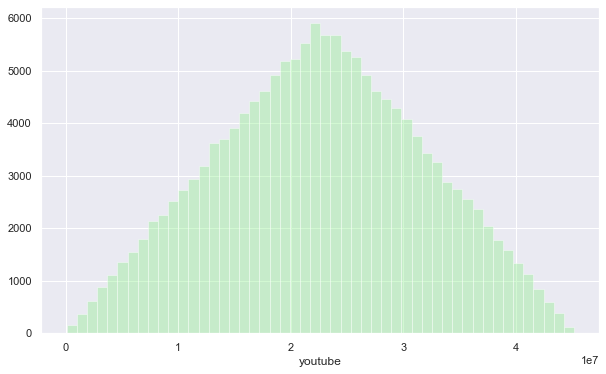

In [11]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.set(style = 'darkgrid')
sns.distplot(analysis_df['youtube'], color = 'lightgreen', kde = False)


# Box plots of all the applications

As we observe on the graph below a lot of bytes are spent on gaming applications compared to the rest.

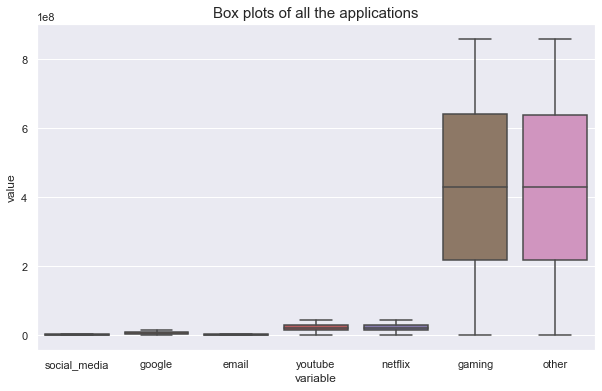

In [12]:
df = analysis_df.drop(['msisdn_number', 'dur', 'Total_DL', 'Total_UL'], axis=1)
sns.set(rc = {'figure.figsize':(10,6)})
plt.title('Box plots of all the applications', fontsize = 15)
sns.boxplot(x = "variable", y = "value", data = pd.melt(df))

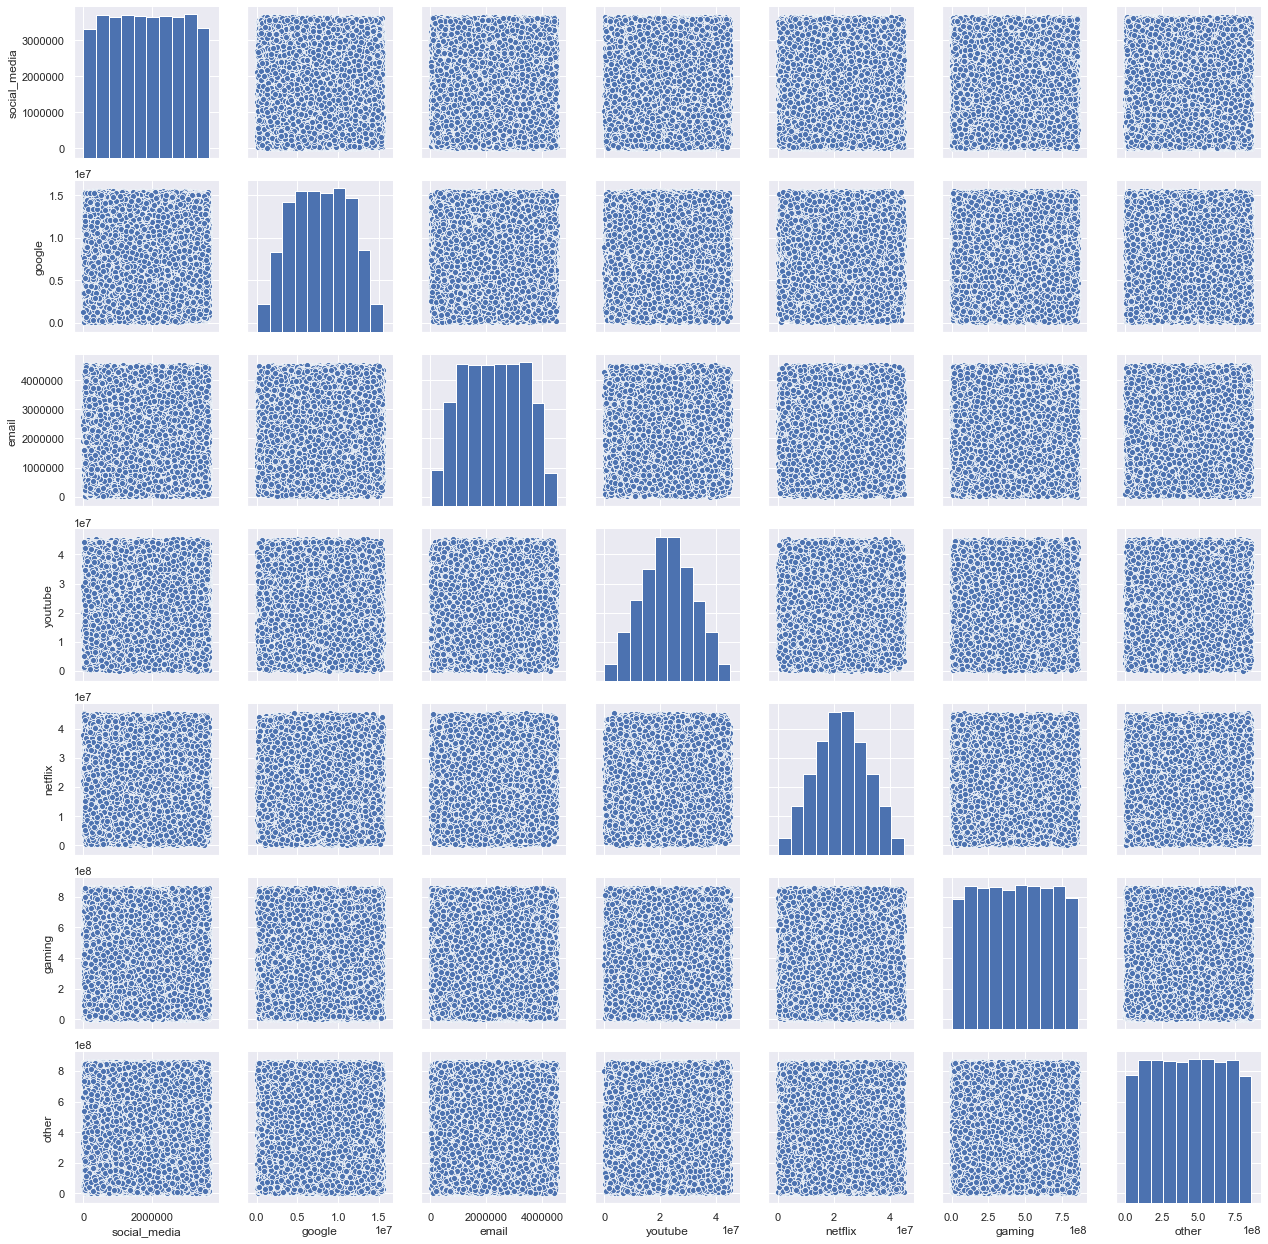

In [14]:
g = sns.pairplot(df)

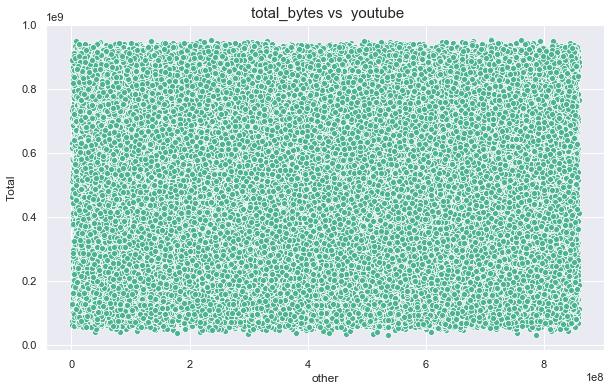

In [15]:
sns.set(rc = {'figure.figsize':(10,6)})
plt.title(' total_bytes vs  other', fontsize = 15)
sns.scatterplot(data = analysis_df, x = 'other', y ='Total', color = '#4CB391')
plt.show()

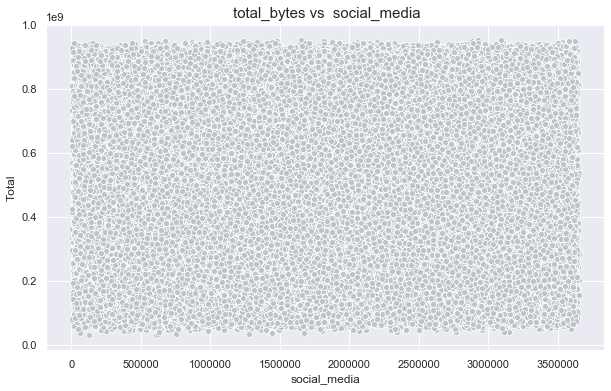

In [16]:
sns.set(rc = {'figure.figsize':(10,6)})
plt.title(' total_bytes vs  social_media', fontsize = 15)
sns.scatterplot(data = analysis_df, x = 'social_media', y ='Total', color = '#BDC3C7')
plt.show()

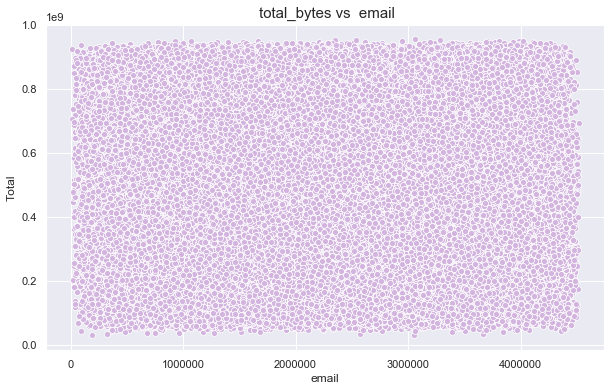

In [21]:
sns.set(rc = {'figure.figsize':(10,6)})
plt.title(' total_bytes vs  email', fontsize = 15)
sns.scatterplot(data = analysis_df, x = 'email', y ='Total', color = '#D2B4DE')
plt.show()

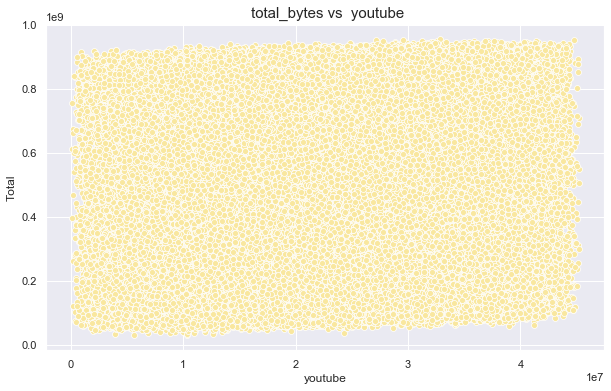

In [18]:
sns.set(rc = {'figure.figsize':(10,6)})
plt.title(' total_bytes vs  youtube', fontsize = 15)
sns.scatterplot(data = analysis_df, x = 'youtube', y ='Total', color = '#F9E79F')
plt.show()

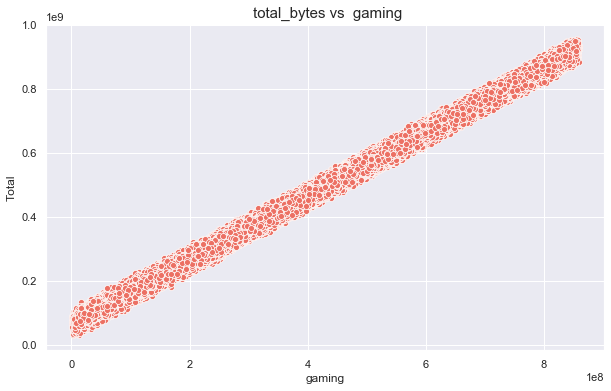

In [19]:
sns.set(rc = {'figure.figsize':(10,6)})
plt.title(' total_bytes vs  gaming', fontsize = 15)
sns.scatterplot(data = analysis_df, x = 'gaming', y ='Total', color = '#EC7063')
plt.show()

# Correlation in between application

From the table below we can observe that google and gaming application have mostly negative correlation with other applications

In [22]:
df.corr(method ='pearson')

,social_media,google,email,youtube,netflix,gaming,other
social_media,1.000000,-0.001708,0.004032,0.000548,0.001013,0.001082,0.006065
google,-0.001708,1.000000,-0.000412,0.002277,-0.001902,-0.000994,-0.001727
email,0.004032,-0.000412,1.000000,-0.002919,0.001029,-0.000644,-0.001299
youtube,0.000548,0.002277,-0.002919,1.000000,0.002882,-0.002999,0.002969
netflix,0.001013,-0.001902,0.001029,0.002882,1.000000,-0.003109,-0.009033
gaming,0.001082,-0.000994,-0.000644,-0.002999,-0.003109,1.000000,-0.002661
other,0.006065,-0.001727,-0.001299,0.002969,-0.009033,-0.002661,1.000000


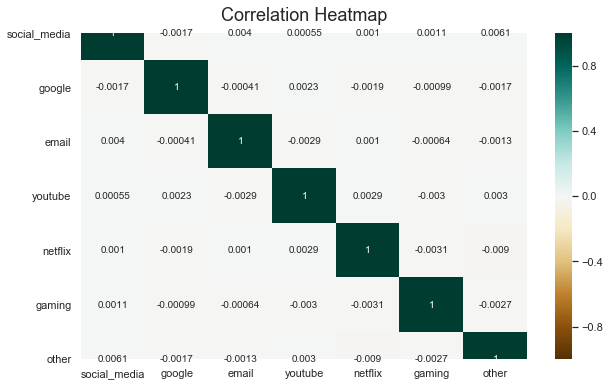

In [39]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot = True, annot_kws={"size": 10}, cmap="BrBG")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [34]:
!pip install --user matplotlib==3.3.3

  Using cached https://files.pythonhosted.org/packages/24/02/202982cbc4ab7a5a87c7f8d16e51d464016af742d5fb2d2b6b23116caec5/matplotlib-3.3.3-cp37-cp37m-win_amd64.whl


In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x= analysis_df.groupby('msisdn_number').sum().loc[:,['social_media','email', 'google','netflix','youtube', 'gaming','other']].values
scaler = StandardScaler()
pca = PCA(n_components=2)
scaler.fit(x)
pca.fit(scaler.transform(x))
pComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = pComponents
             , columns = ['principal component 1', 'principal component 2'])

pComponents.shape

(106856, 2)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()